In [1]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt


In [10]:
def measure_sharpness_L(image):
    laplacian = cv2.Laplacian(image, cv2.CV_64F).var()
    return laplacian


In [11]:
def measure_blur(image):
    fft = np.fft.fft2(image)
    fft_shift = np.fft.fftshift(fft)
    magnitude_spectrum = np.abs(fft_shift)
    blur_metric = np.sum(magnitude_spectrum) / np.size(magnitude_spectrum)
    return blur_metric

In [7]:
directory = r'/home/adam_j4/magisterka/Okreslanie_ostrosci/Ostre'  

image_files = [file for file in os.listdir(directory) if file.endswith('.jpg') or file.endswith('.png')]

images = []
for file in image_files:
    image_path = os.path.join(directory, file)
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    images.append(image)



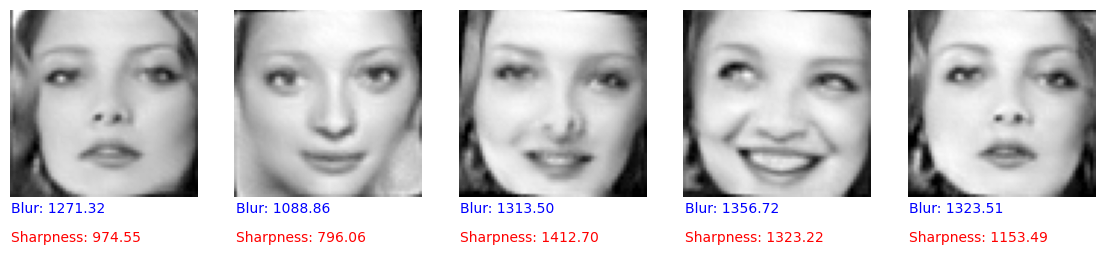

In [31]:
fig, axes = plt.subplots(1, len(images)-1, figsize=(14, 14))  # 1 row, len(images) columns

for ax, image in zip(axes, images):
    ax.imshow(image, cmap='gray')
    ax.axis('off')

    blur = measure_blur(image)
    sharpness = measure_sharpness_L(image)

    ax.text(0, image.shape[0] + 5, f"Blur: {blur:.2f}", color='blue')
    ax.text(0, image.shape[0] + 15, f"Sharpness: {sharpness:.2f}", color='red')

plt.show()



In [25]:
directory = r'/home/adam_j4/magisterka/Okreslanie_ostrosci/Rozmyte/'  

image_files = [file for file in os.listdir(directory) if file.endswith('.jpg') or file.endswith('.png')]

images_2 = []
for file in image_files:
    image_path = os.path.join(directory, file)
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    images_2.append(image)


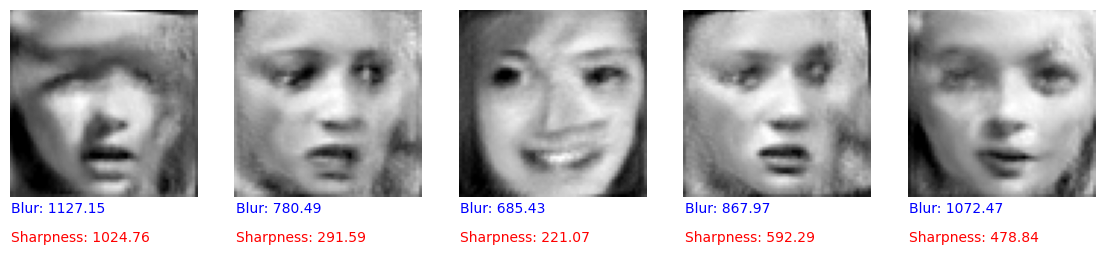

In [32]:
fig, axes = plt.subplots(1, len(images)-1, figsize=(14, 14))  # 1 row, len(images) columns

for ax, image in zip(axes, images_2):
    ax.imshow(image, cmap='gray')
    ax.axis('off')

    blur = measure_blur(image)
    sharpness = measure_sharpness_L(image)

    ax.text(0, image.shape[0] + 5, f"Blur: {blur:.2f}", color='blue')
    ax.text(0, image.shape[0] + 15, f"Sharpness: {sharpness:.2f}", color='red')

plt.show()

In [34]:
import numpy as np
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input
from tensorflow.keras.applications.imagenet_utils import decode_predictions
from scipy.stats import entropy

# Load the Inception v3 model
model = InceptionV3(include_top=True, weights='imagenet', input_tensor=None, input_shape=None)

def calculate_inception_score(images, num_splits=10):
    # Convert images to numpy array and preprocess for Inception v3
    images = np.array(images)
    images = preprocess_input(images)

    # Get the probabilities for all classes
    preds = model.predict(images)

    # Split the probabilities into num_splits groups and calculate the KL divergence for each group
    scores = []
    for i in range(num_splits):
        part = preds[(i * preds.shape[0] // num_splits):((i + 1) * preds.shape[0] // num_splits), :]
        kl = part * (np.log(part) - np.log(np.mean(part)))
        kl = np.mean(np.sum(kl, 1))
        scores.append(np.exp(kl))

    return np.mean(scores), np.std(scores)

# Calculate the Inception Score for the generated images
mean, std = calculate_inception_score(images)
print(f"Inception Score: {mean} with standard deviation: {std}")

/tmp/ipykernel_3148/2332891408.py:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  images = np.array(images)


ValueError: setting an array element with a sequence.